
# Importing Required Packages

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
%matplotlib inline
import numpy as np

# Importing the Dataset

In [3]:
tea_1 = pd.read_csv('TEA.csv')
tea_1

,WATER EXTRACT,CRUDE FIBRE,CAFFEINE,TPC,AOA,TYPE OF TEA
0,29.5,8.9,1.1,9.5,20.8,Black
1,31.0,9.2,1.5,10.1,21.2,Black
2,34.5,10.1,1.7,11.2,21.7,Black
3,40.0,12.0,2.1,12.8,22.9,Black
4,47.1,14.1,3.6,13.3,23.5,Black
5,32.7,1.8,1.1,12.9,26.1,Green
6,35.6,3.0,1.5,13.2,27.5,Green
7,37.0,15.2,1.8,15.6,29.1,Green
8,43.1,18.9,2.3,15.9,32.8,Green
9,48.7,20.5,2.8,16.1,35.3,Green


# Grouping

In [4]:
tea_1.groupby('TYPE OF TEA').size()

TYPE OF TEA
BTSP     7
Black    7
Green    7
dtype: int64

# Plotting

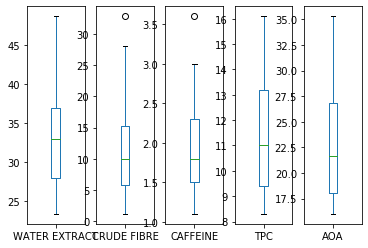

In [5]:
tea_1.plot(kind='box', subplots = True, layout=(1,5), sharex = False, sharey = False)
plt.show()

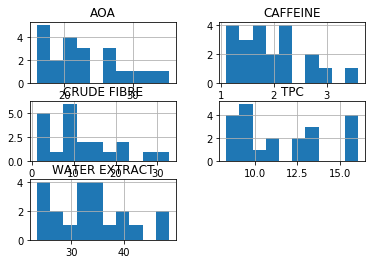

In [9]:
tea_1.hist()
plt.show()

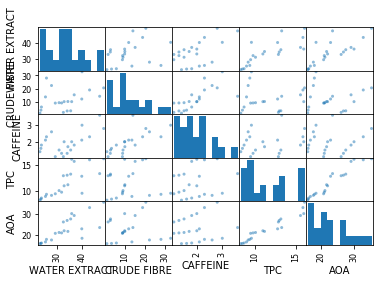

In [6]:
scatter_matrix(tea_1)
plt.show()

# Train Test Split

In [7]:
array = tea_1.values
X = array[:,0:5]
Y = array[:,5]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

# Accuracy

In [8]:
seed = 6
scoring = 'accuracy'


In [9]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))
#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

LR: 0.800000 (0.331662)
LDA: 0.950000 (0.150000)
CART: 0.850000 (0.229129)
KNN: 0.650000 (0.390512)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.750000 (0.403113)
SVM: 0.600000 (0.435890)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Linear Discriminant Analysis = 95%

In [48]:
from sklearn.preprocessing import LabelEncoder
#scaled_inputs_all.iloc[shuffled_indices].values
X = tea_1.iloc[:,0:5].values
y = tea_1['TYPE OF TEA'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Black', 2: 'Green', 3:'BTSP'}

In [41]:
import math

In [49]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [27.2714 15.3286  2.1143  8.9571 17.0571]

Mean Vector class 2: [35.3    10.4714  1.9    11.1    21.8714]

Mean Vector class 3: [38.1857 10.3286  1.8286 14.6714 29.6571]



In [50]:
S_W = np.zeros((5,5))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((5,5))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(5,1), mv.reshape(5,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 631.0829  652.7686   65.4957  101.9686  175.1371]
 [ 652.7686 1350.3429   75.8014  119.3243  235.6614]
 [  65.4957   75.8014    8.1829   12.89     19.7729]
 [ 101.9686  119.3243   12.89     28.6514   37.7486]
 [ 175.1371  235.6614   19.7729   37.7486   79.7886]]


In [51]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((5,5))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(5,1) # make column vector
    overall_mean = overall_mean.reshape(5,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 4.4778e+02 -2.1929e+02 -1.1771e+01  2.0971e+02  4.6349e+02]
 [-2.1929e+02  1.1343e+02  5.7857e+00 -9.2143e+01 -2.0416e+02]
 [-1.1771e+01  5.7857e+00  3.0952e-01 -5.4762e+00 -1.2105e+01]
 [ 2.0971e+02 -9.2143e+01 -5.4762e+00  1.1667e+02  2.5695e+02]
 [ 4.6349e+02 -2.0416e+02 -1.2105e+01  2.5695e+02  5.6596e+02]]


In [52]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(5,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.0438]
 [-0.0174]
 [-0.9575]
 [ 0.2378]
 [ 0.156 ]]
Eigenvalue 1: 3.05e+01

Eigenvector 2: 
[[-0.1825]
 [ 0.0106]
 [ 0.9671]
 [ 0.0074]
 [ 0.177 ]]
Eigenvalue 2: 8.99e-01

Eigenvector 3: 
[[ 0.0366]
 [ 0.0138]
 [ 0.9937]
 [-0.0971]
 [ 0.0403]]
Eigenvalue 3: -5.37e-17

Eigenvector 4: 
[[-0.1115]
 [-0.172 ]
 [ 0.8734]
 [-0.3821]
 [ 0.2215]]
Eigenvalue 4: -2.86e-15

Eigenvector 5: 
[[-0.0905]
 [-0.0904]
 [-0.9218]
 [ 0.3408]
 [-0.1329]]
Eigenvalue 5: 3.72e-16


In [53]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(5,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [54]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

30.476934961504504
0.8987957730303455
2.8607102335430755e-15
3.719872030385762e-16
5.367538113774321e-17


In [55]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 97.14%
eigenvalue 2: 2.86%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%


In [56]:
W = np.hstack((eig_pairs[0][1].reshape(5,1), eig_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.0438 -0.1825]
 [-0.0174  0.0106]
 [-0.9575  0.9671]
 [ 0.2378  0.0074]
 [ 0.156   0.177 ]]


In [57]:
X_lda = X.dot(W)
assert X_lda.shape == (21,2), "The matrix is not 21x2 dimensional."

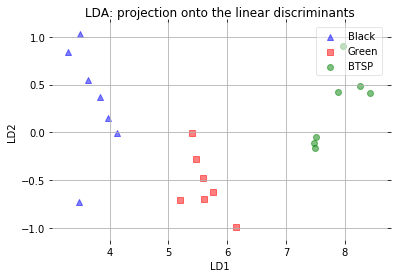

In [64]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: projection onto the linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [66]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

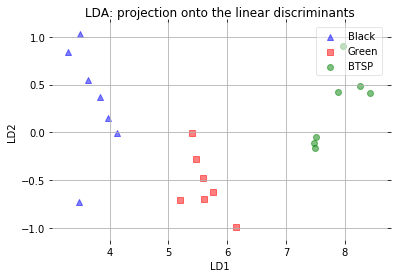

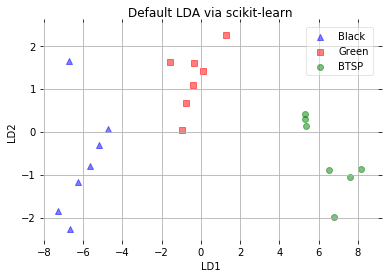

In [67]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')